#  XPCS   Pipeline 

 "This notebook corresponds to version {{ version }} of the pipeline tool: https://github.com/NSLS-II/pipelines"

## NSLS2 data retrieval imports

In [1]:
import sys, shutil
EssCod_PATH='/home/yuzhang/chx-pipelines/Develops/'
EssCod_PATH in sys.path or sys.path.append(EssCod_PATH)
from develop import * 

/home/yuzhang/.conda/envs/user_analysis/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:

%matplotlib notebook

### Lazy Eiger Handler (later will goto databroker)

### Get the events from the uid

In [3]:
uid = 'c423e856'

uid = '528bd8'
uid = '54614d43'
uid = '95782687'
uid= 'fa5fdae'

uid = 'ff9f20c0'
uid='71720966'
uid = '377dad97' # Deposition at 6 mTorr
#uid = 'bece0b55' # Presputter for 6 mTorr
uid = '4d82cc38'  # 10 mTorr 0.2 fps 2500 frames
uid = 'ffe9d518' # 10 mTorr 1 fps 15,000 frames
hdr = db[uid]

In [8]:
ev, = get_events(hdr, ['eiger_4M_cam_img_image_lightfield'], fill = True)

hdf5 path = /XF11ID/data/2015/11/8/3f84f57d-79b7-4a10-8b51_5_master.h5


In [9]:

dt = datetime.fromtimestamp(hdr['start'].time)
path ='/XF11ID/analysis' + '/%s/%s/%s/' % (dt.year, dt.month, dt.day)
path

'/XF11ID/analysis/2015/11/8/'

In [10]:
imgs = ev['data']['eiger_4M_cam_img_image_lightfield']
print (imgs)
Nimg=len(imgs)

<Frames>
Length: 15000 frames
Frame Shape: 2167 x 2070
Pixel Datatype: uint32


## load a mask if exist 
### otherwise create a mask using Mask pipeline

In [11]:

mask = np.load( path +  str(uid)+"_mask.npy")
 

####### Plot the mask

In [12]:
imgsr = Reverse_Coordinate(imgs, mask)    
masker = Masker( imgsr, mask)

In [13]:
imgsr.length

15000

In [14]:
imgsr[2499].max()

17255

## Interactive way to browse through images.

### Note : Provide the number of images that you want to browse

In [15]:
#interact(view_image, i=(0, Nimg-1))

In [16]:
#view_image_movie( imgsr,.1, 1000, 1001) 

### hey, let's see if any images are bad!

### Get the Averaged Image Data

In [17]:
good_start = 7500
good_end= 14999

avg_img = np.average( imgs[good_start:good_end: 100], axis=0) #*imgs.md['pixel_mask']  #*mask_rh

avg_img *=  mask

In [18]:
#avg_img = average_img( imgsr,0, 2000 )

In [19]:
avg_img  = avg_img[::-1,:] 

<IPython.core.display.Javascript object>


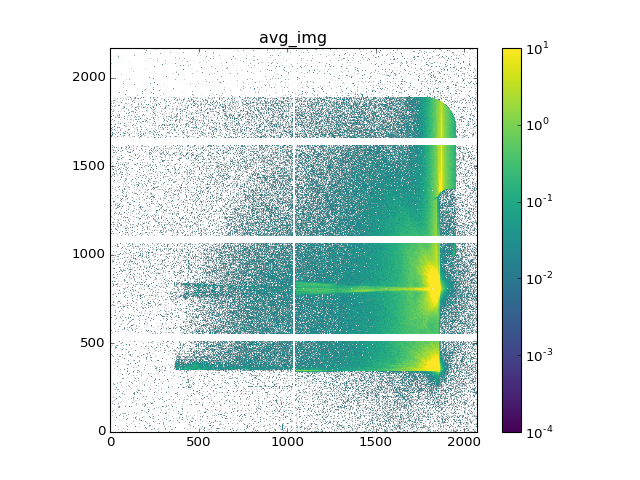

In [20]:
fig, ax = plt.subplots()
#im=ax.imshow(alphaf, origin='lower' ,cmap='viridis',norm= LogNorm(vmin=0.0001,vmax=2.00))
im=ax.imshow(avg_img, origin='lower' ,cmap='viridis',norm= LogNorm(vmin=0.0001,vmax=1E1))
fig.colorbar(im)
ax.set_title( 'avg_img')
plt.show()

## Plot the averged image with the mask

In [21]:
print (avg_img.max())

4664.49333333


## Note:  experiment information 

* The physical size of the pixels
* Wavelegth of the X-rays  - (units in Angstroms)
* Detector to sample distance
* Exposure time - (units in seconds)
* acqusition period - (units in seconds)
* dead time - (units in seconds)
* time per frame = (exposure time + dead_time or acqusition period) - (units in seconds)

In [22]:
#imgs.md

In [23]:
# The physical size of the pixels
dpix = imgs.md['x_pixel_size'] * 1000.  
lambda_ = imgs.md['incident_wavelength']    # wavelegth of the X-rays in Angstroms
Ldet = 4810        # detector to sample distance (mm)

exposuretime= imgs.md['count_time']
acquisition_period = imgs.md['frame_time']

# deadtime= 0   # 60e-6 
# timeperframe = exposuretime + deadtime
timeperframe = acquisition_period  

timeperframe, exposuretime

(1.00001, 1.0)

## Import all the required packages for  Data Analysis

* scikit-xray - data analysis tools for X-ray science 
    - https://github.com/scikit-xray/scikit-xray
* xray-vision - plotting helper functions for X-ray science
    - https://github.com/Nikea/xray-vision


## Get the approximate center and see the statistic to make sure 

### Qz, Qr Average : to do!

# GiSAXS get q-map (qz and qr)

In [24]:
inc_x0 = 1871
inc_y0 = 339
refl_x0 = 1871
refl_y0 = 811      #1670
Lsd= 4.81
lamda= lambda_  #12.4/9

In [25]:
lamda

1.3776

In [26]:
#cd /home/yuzhang/chx-pipelines/Develops/

In [27]:
#%run develop.py

In [28]:
alphaf,thetaf, alphai, phi = get_reflected_angles( inc_x0, inc_y0,refl_x0 , refl_y0, Lsd=Lsd )

The incident_angle (alphai) is: 0.210835132612


In [29]:
qx, qy, qr, qz = convert_gisaxs_pixel_to_q( inc_x0, inc_y0,refl_x0,refl_y0, lamda=lamda, Lsd=Lsd )

The incident_angle (alphai) is: 0.210835132612


<IPython.core.display.Javascript object>


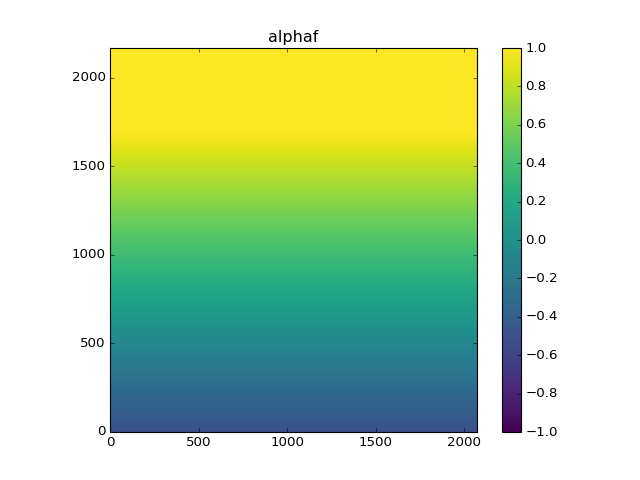

In [30]:
fig, ax = plt.subplots()
#im=ax.imshow(alphaf, origin='lower' ,cmap='viridis',norm= LogNorm(vmin=0.0001,vmax=2.00))
im=ax.imshow(alphaf*180/np.pi, origin='lower' ,cmap='viridis',vmin=-1,vmax= 1 )
fig.colorbar(im)
ax.set_title( 'alphaf')
plt.show()

<IPython.core.display.Javascript object>


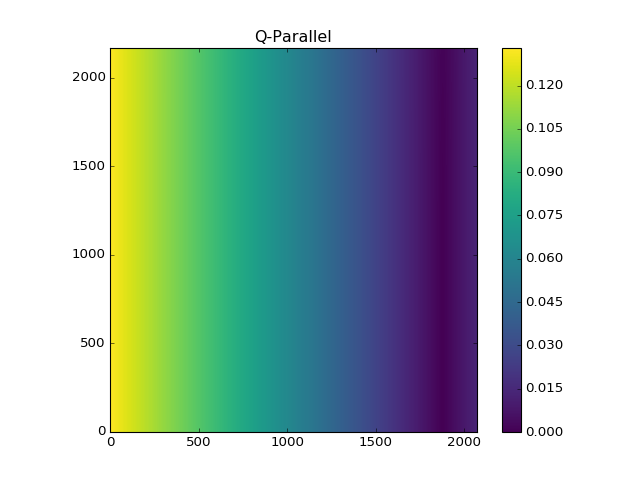

In [31]:
fig, ax = plt.subplots()
#im=ax.imshow(alphaf, origin='lower' ,cmap='viridis',norm= LogNorm(vmin=0.0001,vmax=2.00))
im=ax.imshow(qr, origin='lower' ,cmap='viridis',vmin=qr.min(),vmax= qr.max() )
fig.colorbar(im)
ax.set_title( 'Q-Parallel')
plt.show()

<IPython.core.display.Javascript object>


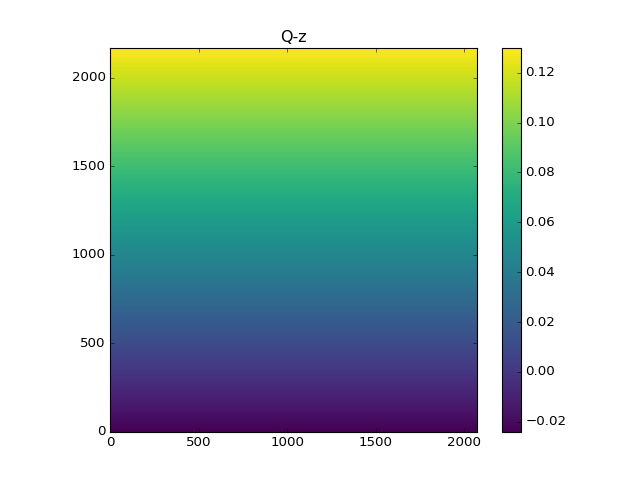

In [32]:
fig, ax = plt.subplots()
#im=ax.imshow(alphaf, origin='lower' ,cmap='viridis',norm= LogNorm(vmin=0.0001,vmax=2.00))
im=ax.imshow(qz, origin='lower' ,cmap='viridis',vmin=qz.min(),vmax= qz.max() )
fig.colorbar(im)
ax.set_title( 'Q-z')
plt.show()

# get GiSAXS label array

<IPython.core.display.Javascript object>


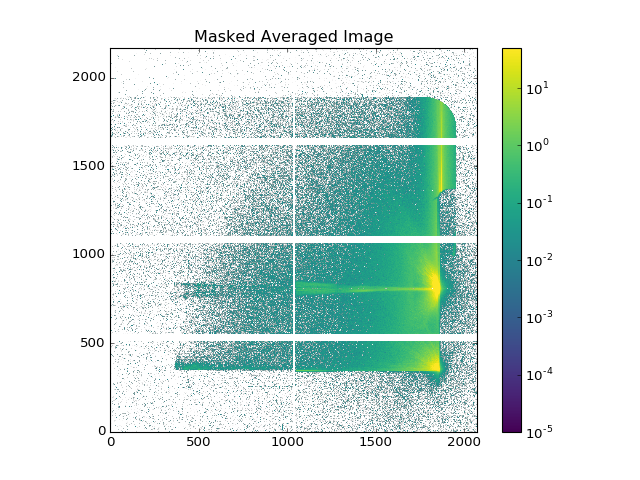

In [33]:
fig, ax = plt.subplots()
im = ax.imshow(avg_img, cmap='viridis', origin = 'lower',  norm= LogNorm( vmin=0.00001, vmax=.5e2 ) )
ax.set_title("Masked Averaged Image")
fig.colorbar(im)
plt.show()

# Get q||-intensity

In [34]:
#bin_img = 500
#Nbin = int( len(imgs)/bin_img )
#[ (i*bin_img, (i+1)*bin_img) for i in range(Nbin)               ]
#ave_img_series =  [   average_img( imgsr,i, i*bin_img )    for i in range(Nbin)                ]

In [35]:
vert_rect = ( ( 850, 0, 980- 850, 1600-0) , ( 570, 0, 700- 570, 1600-0) )    #(y,x, hight, wdith)

<IPython.core.display.Javascript object>


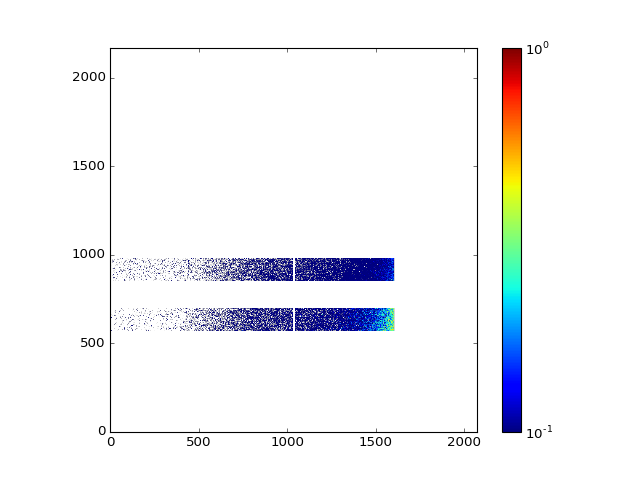

<IPython.core.display.Javascript object>


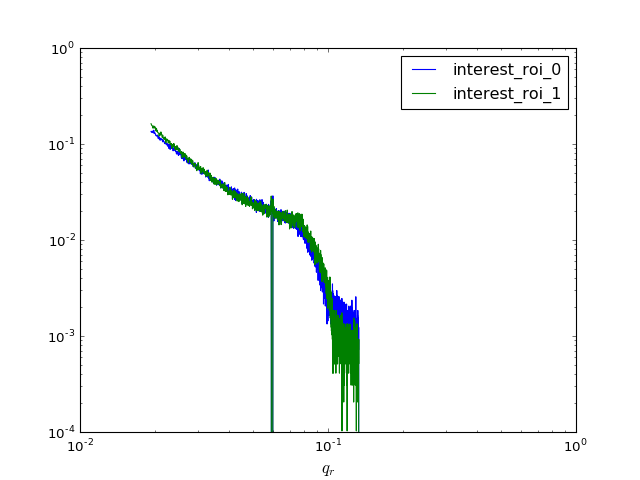

0 (850, 0, 130, 1600)
1 (570, 0, 130, 1600)


In [36]:
get_qr_intensity( qr, avg_img, vert_rect, show_roi=True)

In [37]:
qz_start = qz[670,0]
qz_end = qz[950,0]
qz_num= 2


qr_start =  qr[600,1700]
qr_end = qr[600,0]
qr_num = 15

In [38]:
qr_edge, qr_center = get_qedge(qr_start , qr_end, ( qr_end- qr_start)/qr_num, qr_num )

the qcenter is:  [ 0.01216096  0.02079352  0.02942609  0.03805865  0.04669122  0.05532378
  0.06395634  0.07258891  0.08122147  0.08985404  0.0984866   0.10711917
  0.11575173  0.1243843   0.13301686]


In [39]:
qz_edge, qz_center = get_qedge( qz_start,   qz_end,   (qz_end - qz_start)/(qz_num -0) , qz_num )

the qcenter is:  [ 0.02353945  0.04345093]


In [40]:
label_array_qz = get_qmap_label( qz, qz_edge)
label_array_qr = get_qmap_label( qr, qr_edge)
label_array_qzr,qzc,qrc = get_qzrmap(label_array_qz, label_array_qr,qz_center, qr_center  )

In [41]:
labels_qzr, indices_qzr = roi.extract_label_indices( label_array_qzr  )
labels_qz, indices_qz = roi.extract_label_indices( label_array_qz  )
labels_qr, indices_qr = roi.extract_label_indices( label_array_qr  )

In [42]:
num_qz = len(np.unique( labels_qz ))
num_qr = len(np.unique( labels_qr ))
num_qzr = len(np.unique( labels_qzr ))

In [43]:
num_qz,num_qr,num_qzr


(2, 15, 30)

<IPython.core.display.Javascript object>


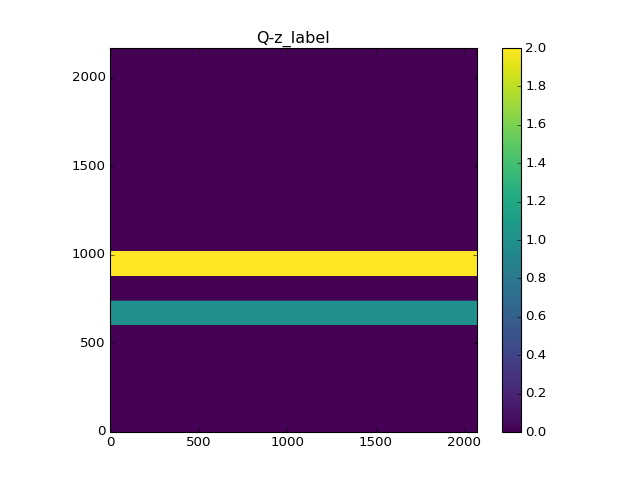

In [44]:
fig, ax = plt.subplots()
#im=ax.imshow(alphaf, origin='lower' ,cmap='viridis',norm= LogNorm(vmin=0.0001,vmax=2.00))
im=ax.imshow(label_array_qz, origin='lower' ,cmap='viridis',vmin=0,vmax= None )
fig.colorbar(im)
ax.set_title( 'Q-z_label')
plt.show()

<IPython.core.display.Javascript object>


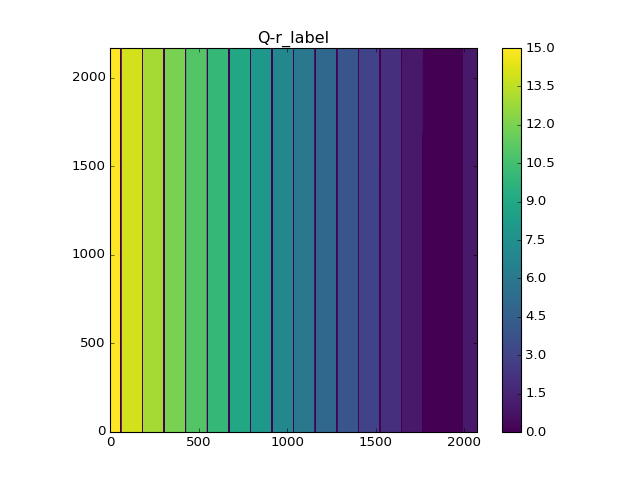

In [45]:
fig, ax = plt.subplots()
#im=ax.imshow(alphaf, origin='lower' ,cmap='viridis',norm= LogNorm(vmin=0.0001,vmax=2.00))
im=ax.imshow(label_array_qr, origin='lower' ,cmap='viridis',vmin=0,vmax= None )
fig.colorbar(im)
ax.set_title( 'Q-r_label')
plt.show()

<IPython.core.display.Javascript object>


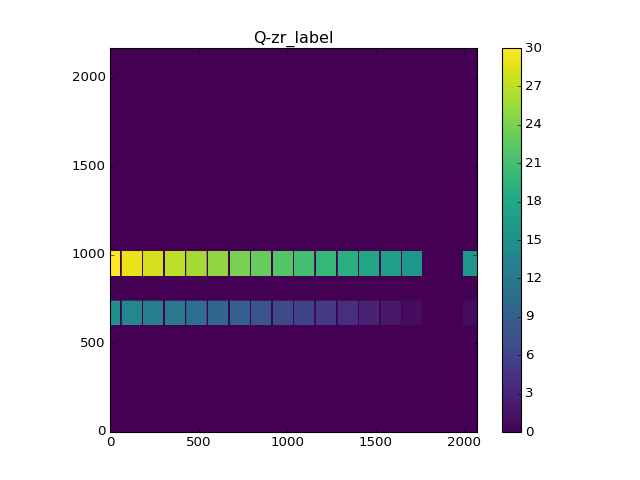

In [46]:
if True:
    fig, ax = plt.subplots()
    #im=ax.imshow(alphaf, origin='lower' ,cmap='viridis',norm= LogNorm(vmin=0.0001,vmax=2.00))
    im=ax.imshow(label_array_qzr, origin='lower' ,cmap='viridis',vmin=0,vmax= None )
    fig.colorbar(im)
    ax.set_title( 'Q-zr_label')
    plt.show()

In [47]:
rings = label_array_qzr 
ring_mask = rings*mask
labels, indices = roi.extract_label_indices(ring_mask)

## Number of pixels in each q ring

In [48]:
#ring_mask

In [49]:
nopr = np.bincount( np.array(labels, dtype=int) )[1:]
nopr

array([27383, 15846, 15707, 15707, 15846, 15290, 15846, 15707, 15707,
       15846, 15707, 15846, 15707, 15846,  7923, 27777, 16074, 15933,
       15933, 16074, 15510, 16073, 15933, 15933, 16056, 15933, 16074,
       15933, 16074,  8037])

# check one_qz_qr_region

In [50]:
#%run develop.py

<IPython.core.display.Javascript object>


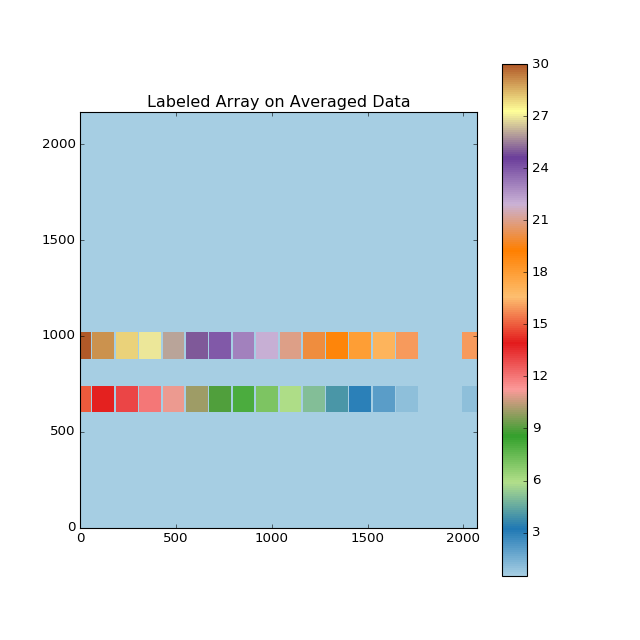

In [51]:

# plot the figure
fig, axes = plt.subplots(figsize=(8,8))
axes.set_title("Labeled Array on Averaged Data")
im,im_label = show_label_array_on_image(axes, avg_img, ring_mask, imshow_cmap='viridis', cmap='Paired',
                         vmin=0.01, vmax=30 ,  origin="lower")
#rwidth = 200 
#x1,x2 = [center[1] - rwidth, center[1] + rwidth]
#y1,y2 = [center[0] - rwidth, center[0] + rwidth]
#axes.set_xlim( [x1,x2])
#axes.set_ylim( [y1,y2])
fig.colorbar(im_label)
plt.show()

##  Kymograph(waterfall plot) of the 3rd ring

In [ ]:
#kymo = roi.kymograph(imgsr[::50], ring_mask, num = 1)

In [ ]:
if False:
    fig, ax = plt.subplots(figsize=(8,6))
    ax.set_ylabel('Pixel')
    ax.set_xlabel('Frame')
    ax.set_title('Kymograph')

    im = ax.imshow(kymo.T, cmap='viridis', vmax=10)
    #fig.colorbar( im   )
    ax.set_aspect(0.002)
    plt.show()

##  Mean intensities for each interested qz_qr

In [ ]:
#imgsr = Reverse_Coordinate(imgs, mask)    
#masker = Masker( imgsr, mask)

In [ ]:
Nm=10

mask_data = masker[::Nm]  #make  masker[::1] will be very slow!
mean_int_sets, index_list = roi.mean_intensity(mask_data, ring_mask)

In [ ]:
mean_int_sets.shape

In [ ]:
#Nm=50

In [ ]:
if True:
    time = np.arange(len(mask_data))*Nm  # get the time for each frame

    #%matplotlib inline
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_title("Mean intensity of each Qzr")
    for i in range(num_qzr):
        ax.plot(time, mean_int_sets[:,i], label="Qzr "+str(i+1))
        ax.set_xlabel("Frames")
        ax.set_ylabel("Mean Intensity")
        ax.set_yscale('log')
    ax.legend(fontsize=4) 
    plt.show()

## One time Correlation

Note : Enter the number of levels and number of buffers for Muliti tau one time correlation
number of buffers has to be even. More details in https://github.com/scikit-xray/scikit-xray/blob/master/skxray/core/correlation.py

In [52]:
#ring_mask = np.array( ring_mask, dtype=int)

In [54]:
good_start = 7500
good_end = 14999
#good_end = 6500

In [55]:
imgs_ =imgs[good_start: good_end-1]

In [56]:
imgsr2 = Reverse_Coordinate(imgs_, mask)    

In [57]:
num_lev = 9  
num_buf = 8

g2, lag_steps = corr.multi_tau_auto_corr(num_lev, num_buf,  ring_mask, imgsr2)

In [58]:
lags = lag_steps*timeperframe

In [59]:
lag_steps

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,   10,   12,
         14,   16,   20,   24,   28,   32,   40,   48,   56,   64,   80,
         96,  112,  128,  160,  192,  224,  256,  320,  384,  448,  512,
        640,  768,  896, 1024, 1280, 1536, 1792])

In [60]:
g2.shape

(40, 30)

In [61]:
lag_steps.shape

(40,)

In [62]:
np.save( path + 'g2_%s-%s--%s'%(uid,good_start, good_end), g2)

In [63]:
num_qr, num_qz, num_qzr

(15, 2, 30)

### Plot the one time correlation functions

<IPython.core.display.Javascript object>


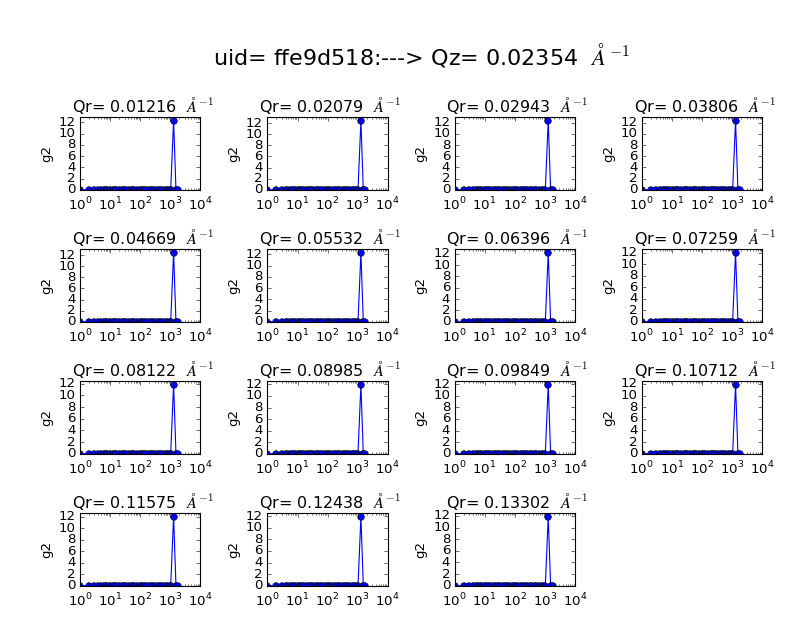

<IPython.core.display.Javascript object>


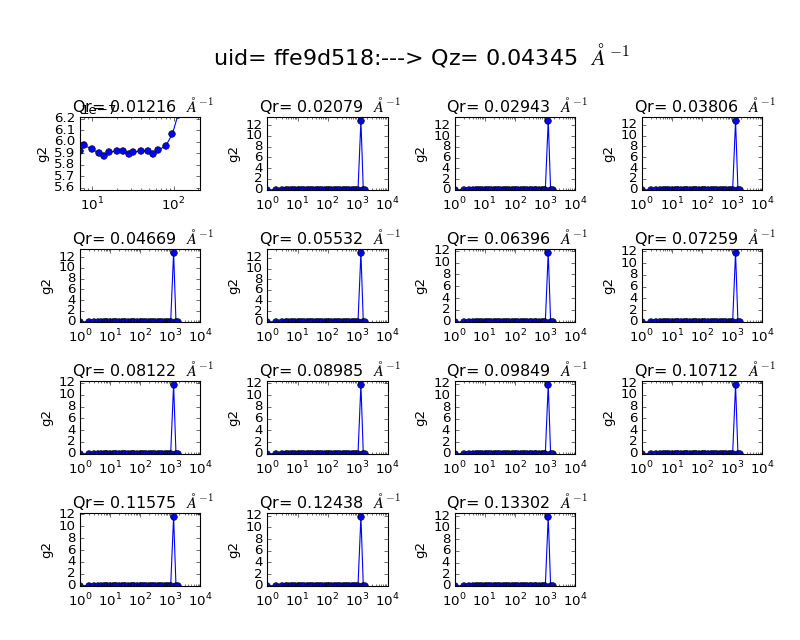

In [64]:

for qz_ind in range(num_qz):
    fig = plt.figure(figsize=(10, 8))
    title_qz = ' Qz= %.5f  '%( qz_center[qz_ind]) + r'$\AA^{-1}$' 
    plt.title('uid= %s:--->'%uid + title_qz,fontsize=20, y =1.1) 
    #print (qz_ind,title_qz)
    plt.axis('off')
    sx = int(round(np.sqrt(num_qr)) )
    if num_qr%sx == 0: 
        sy = int(num_qr/sx)
    else:
        sy=int(num_qr/sx+1) 
    for sn in range(num_qr):
        ax = fig.add_subplot(sx,sy,sn+1 )
        ax.set_ylabel("g2") 
        ax.set_title(" Qr= " + '%.5f  '%( qr_center[sn]) + r'$\AA^{-1}$')
        y=g2[:, sn + qz_ind * num_qr]
        ax.semilogx(lags, y, '-o', markersize=6) 
        ax.set_ylim([min(y)*.95, max(y[1:])*1.05 ])
    plt.show()
    fig.tight_layout()  


#np.save( path + 'g2_%s--%s'%(good_start, good_end), [lags,g2])
#lags,g2 = np.load( path + 'g2_%s--%s.npy'%(good_start, good_end) )

    

In [ ]:
#Two time correlation

In [ ]:
#%run develop.py

In [86]:
good_start= 0
good_end = 2499

In [73]:
imgs_ =imgs[good_start: good_end-1]

In [74]:
imgsr2 = Reverse_Coordinate(imgs_, mask)    

In [75]:
#dly = delays( num_lev=3, num_buf=4, time = 1  )

In [107]:
num_buf=  100

In [108]:
from two_time import *

In [ ]:
g12 = autocor_two_time(num_lev=10, num_buf= num_buf,  ring_mask=ring_mask,
                       imgs = imgsr2,  start_img= 0, end_img= None  )
np.save( path + 'g12_%s_%s_%s--buf=%s'%(uid ,good_start, good_end, num_buf), g12)

#

In [80]:
def interp_zeros(  data ): 
    from scipy.interpolate import interp1d
    gf = data.ravel() 
    indice, = gf.nonzero() 
    start, stop = indice[0], indice[-1]+1 
    dx,dy = data.shape 
    x=np.arange( dx*dy ) 
    f = interp1d(x[indice], gf[indice]) 
    gf[start:stop] = f(x[start:stop]) 
    return gf.reshape([dx,dy]) 
 

 

In [88]:

#g12 = np.load( path + 'g12_%s_%s_%s--buf=%s.npy'%(uid, good_start, good_end,num_buf))

<IPython.core.display.Javascript object>


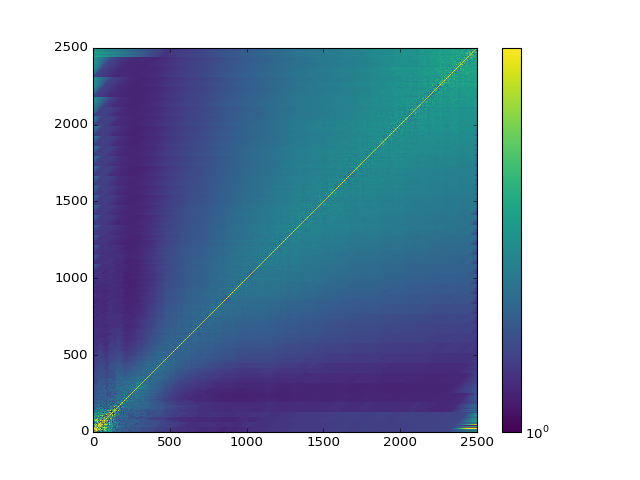

In [106]:
N12 = 16

data = g12[:,:,N12]
data = interp_zeros( data )

fig, ax = plt.subplots()
im=ax.imshow( data, origin='lower' , cmap='viridis', 
             norm= LogNorm( vmin=1.0, vmax= 1.2 ) )
fig.colorbar(im)
plt.show()

<IPython.core.display.Javascript object>


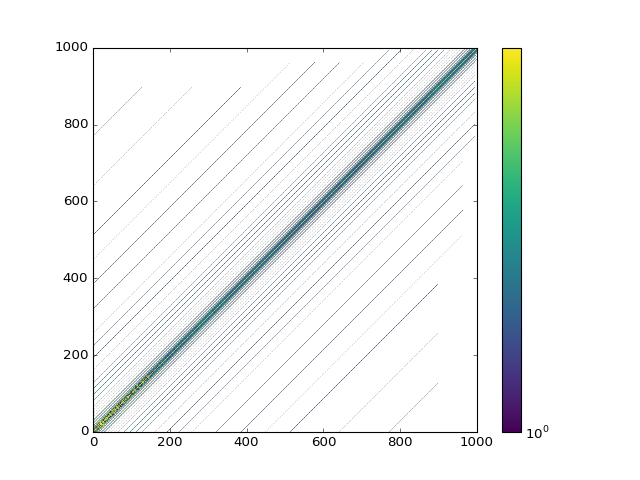

In [71]:
N12 = 16

fig, ax = plt.subplots()
im=ax.imshow(g12[:,:,N12], origin='lower' , cmap='viridis', 
             norm= LogNorm( vmin=1.0, vmax= 1.2 ) )
fig.colorbar(im)
plt.show()

In [ ]:
%run two_time.py

In [ ]:
num_lev, num_buf,  ring_mask, imgs

In [ ]:
dly

In [65]:
hdr

{'descriptors': [{'data_keys': {'eiger_4M_cam_img_acquire_period': {'dtype': 'number',
     'shape': [],
     'source': 'PV:XF:11IDB-BI{Det:Eig4M}cam1:AcquirePeriod_RBV'},
    'eiger_4M_cam_img_acquire_time': {'dtype': 'number',
     'shape': [],
     'source': 'PV:XF:11IDB-BI{Det:Eig4M}cam1:AcquireTime_RBV'},
    'eiger_4M_cam_img_image_lightfield': {'dtype': 'array',
     'external': 'FILESTORE:',
     'shape': [15000, 2167, 2070],
     'source': 'PV:XF:11IDB-BI{Det:Eig4M}'},
    'eiger_4M_cam_img_stats_total1': {'dtype': 'number',
     'shape': [],
     'source': 'PV:XF:11IDB-BI{Det:Eig4M}Stats1:Total_RBV'},
    'eiger_4M_cam_img_stats_total2': {'dtype': 'number',
     'shape': [],
     'source': 'PV:XF:11IDB-BI{Det:Eig4M}Stats2:Total_RBV'},
    'eiger_4M_cam_img_stats_total3': {'dtype': 'number',
     'shape': [],
     'source': 'PV:XF:11IDB-BI{Det:Eig4M}Stats3:Total_RBV'},
    'eiger_4M_cam_img_stats_total4': {'dtype': 'number',
     'shape': [],
     'source': 'PV:XF:11IDB-BI{Det:Eig4M}Stats4:Total_RBV'},
    'eiger_4M_cam_img_stats_total5': {'dtype': 'number',
     'shape': [],
     'source': 'PV:XF:11IDB-BI{Det:Eig4M}Stats5:Total_RBV'},
    'eiger_4M_cam_imgsequenceid': {'dtype': 'number',
     'shape': [],
     'source': 'PV:XF:11IDB-BI{Det:Eig4M}cam1:SequenceId'}},
   'run_start': 'ffe9d518-aa6a-43d7-8eb0-17e285796e7b',
   'time': 1447041726.2105048,
   'uid': '561c125e-cf3f-4adb-8a56-130d617093c7'}],
 'start': {'beamline_id': 'CHX',
  'config': {},
  'group': 'chx',
  'owner': 'xf11id',
  'project': 'In-situ sputter deposition',
  'sample': {'material': 'none', 'type': 'stability'},
  'scan_args': {'delay': '0',
   'detectors': "[AreaDetectorFileStoreEiger(name='eiger_4M_cam_img', basename='XF:11IDB-BI{Det:Eig4M}', stats=range(1, 6), shutter=None, shutter_rb=None, shutter_val=None, file_path='/XF11ID/data/', ioc_file_path=None)]",
   'num': '1'},
  'scan_id': 671,
  'scan_type': 'Count',
  'time': 1447026715.518397,
  'uid': 'ffe9d518-aa6a-43d7-8eb0-17e285796e7b'},
 'stop': {'exit_status': 'success',
  'reason': '',
  'run_start': 'ffe9d518-aa6a-43d7-8eb0-17e285796e7b',
  'time': 1447041726.263779,
  'uid': 'f7d22f7f-33b0-41ca-a51e-4a2a37c121cc'}}